In [42]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [43]:
lab_file = Path("ELEC 343 Lab 1.xlsx")
sheet_name = ["2C", "2D"]

sheet_read = []
for sheet in sheet_name:
    read = pd.read_excel(lab_file, sheet_name = sheet, skiprows=3)
    sheet_read.append(read)

## Part 2C

In [44]:
df = pl.DataFrame(sheet_read[0])

conversion_coefficient = 1
friction_force = conversion_coefficient * 1
k1 = 1
k2 = 2
i = 1
df = df.with_columns(
    (pl.col("load cell voltage") * conversion_coefficient).alias("total measured force"),
    (-k1 * (i ** 2) / (pl.col("Position (mm/100)") + k2) ** 2 / 2).alias("electromagnetic force from model"), 
).with_columns(
    (pl.col("total measured force") - friction_force).alias("electromagnetic force")  # Subtract friction
)
df

Position (mm/100),load cell voltage,total measured force,electromagnetic force,electromagentic force from model,electromagnetic force from model
i64,f64,f64,f64,f64,f64
0,3.515,3.515,2.515,null,-0.125
25,3.487,3.487,2.487,null,-0.000686
50,3.411,3.411,2.411,null,-0.000185
75,3.383,3.383,2.383,null,-0.000084
100,3.252,3.252,2.252,null,-0.000048
…,…,…,…,…,…
700,0.608,0.608,-0.392,null,-0.000001
800,0.532,0.532,-0.468,null,-7.7736e-7
900,0.485,0.485,-0.515,null,-6.1455e-7


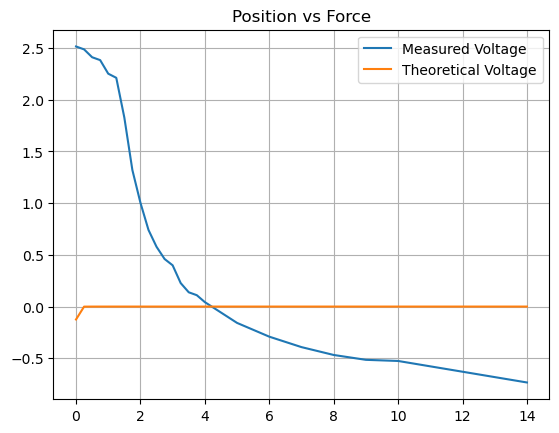

In [63]:
position = df.select('Position (mm/100)') / 100
voltage = df.select('electromagnetic force')
theo_voltage = df.select('electromagnetic force from model')

fig, ax = plt.subplots()
ax.plot(position, voltage, label='Measured Voltage')
ax.plot(position, theo_voltage, label = 'Theoretical Voltage')
ax.set_title("Position vs Force")
ax.legend()
plt.grid()

## Part 2D

In [50]:
df_d = pl.DataFrame(sheet_read[1])

conversion_coefficient = 1
friction_force = conversion_coefficient * 1
k1 = 1
k2 = 2
i = 1

df_d = df_d.with_columns(
    (pl.col("load cell voltage") * conversion_coefficient).alias("total measured force"),
    (-k1 * (pl.col("solenoid current") ** 2) / (0.001 + k2) ** 2 / 2).alias("electromagnetic force from model"), 
).with_columns(
    (pl.col("total measured force") - friction_force).alias("electromagnetic force")  # Subtract friction
)
df_d = df_d.drop('electromagentic force from model')
df_d

Applied voltage,solenoid current,load cell voltage,total measured force,electromagnetic force from model,electromagnetic force
f64,f64,f64,f64,f64,f64
1.0,0.046,0.115,0.115,-0.000264,-0.885
1.5,0.065,0.243,0.243,-0.000528,-0.757
2.0,0.084,0.381,0.381,-0.000881,-0.619
2.5,0.103,0.598,0.598,-0.001325,-0.402
3.0,0.122,0.757,0.757,-0.001859,-0.243
…,…,…,…,…,…
10.0,0.366,3.185,3.185,-0.016728,2.185
10.0,0.366,3.191,3.191,-0.016728,2.191
10.0,0.366,3.22,3.22,-0.016728,2.22


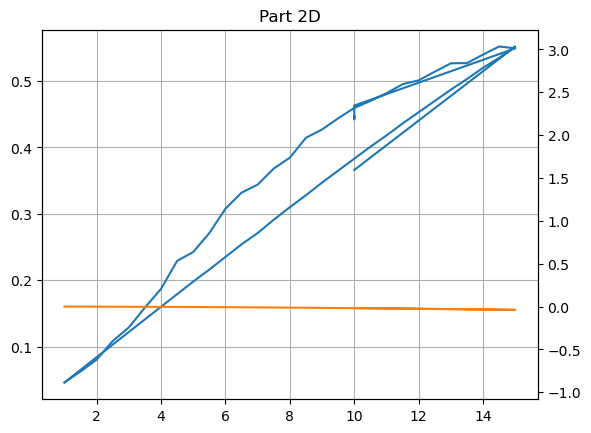

In [67]:
applied_voltage = df_d.select('Applied voltage')
current = df_d.select('solenoid current')
force = df_d.select('electromagnetic force')
theo_force = df_d.select('electromagnetic force from model')

fig, ax = plt.subplots()
ax.plot(applied_voltage, current, label ='Measured Current')
ax2 = ax.twinx()
ax2.plot(applied_voltage, force, label='Measured Force')
ax2.plot(applied_voltage, theo_force, label='Theoretical Force')
ax.set_title('Part 2D')
ax.grid()

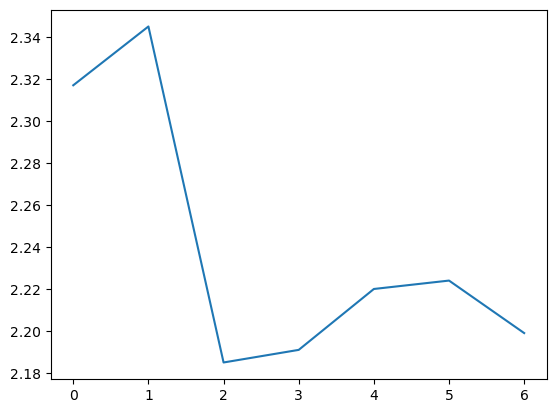

In [69]:
speed_data = df_d.filter(pl.col('Applied voltage') == 10)
speed_data

plt.plot(speed_data['electromagnetic force'])